<a href="https://colab.research.google.com/github/aaronpetryio/ffdp-exercises/blob/main/ffdp_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         671 non-null    object 
 1   Tm             671 non-null    object 
 2   Pos            596 non-null    object 
 3   Age            671 non-null    int64  
 4   G              671 non-null    int64  
 5   GS             671 non-null    int64  
 6   Tgt            670 non-null    float64
 7   Rec            670 non-null    float64
 8   PassingYds     670 non-null    float64
 9   PassingTD      670 non-null    float64
 10  PassingAtt     670 non-null    float64
 11  RushingYds     670 non-null    float64
 12  RushingTD      670 non-null    float64
 13  RushingAtt     670 non-null    float64
 14  ReceivingYds   670 non-null    float64
 15  ReceivingTD    670 non-null    float64
 16  FantasyPoints  581 non-null    float64
 17  Int            670 non-null    float64
 18  Fumbles   

In [10]:
pd.set_option('chained_assignment', None)

In [12]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1
}

rb_df = df.loc[df['Pos'] == 'RB']
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0
10,Joe Mixon*,CIN,RB,25,16,16,48.0,42.0,0.0,0.0,0.0,1205.0,13.0,292.0,314.0,3.0,246.0,0.0,2.0,1.0
13,Najee Harris*,PIT,RB,23,17,17,94.0,74.0,0.0,0.0,0.0,1200.0,7.0,307.0,467.0,3.0,227.0,0.0,0.0,0.0
15,James Conner*,ARI,RB,26,15,6,39.0,37.0,0.0,0.0,0.0,752.0,15.0,202.0,375.0,3.0,221.0,0.0,2.0,0.0


In [13]:
def get_fantasy_points(row):
  g = row['G']

  fantasy_points = sum(
      [row[column]*weight for column, weight in fantasy_scoring_weights.items()]
  )

  return fantasy_points / g

In [14]:
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis = 1)

In [15]:
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,FantasyPoints/G
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,21.947059
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0,21.237500
10,Joe Mixon*,CIN,RB,25,16,16,48.0,42.0,0.0,0.0,0.0,1205.0,13.0,292.0,314.0,3.0,246.0,0.0,2.0,1.0,17.993750
13,Najee Harris*,PIT,RB,23,17,17,94.0,74.0,0.0,0.0,0.0,1200.0,7.0,307.0,467.0,3.0,227.0,0.0,0.0,0.0,17.688235
15,James Conner*,ARI,RB,26,15,6,39.0,37.0,0.0,0.0,0.0,752.0,15.0,202.0,375.0,3.0,221.0,0.0,2.0,0.0,17.180000


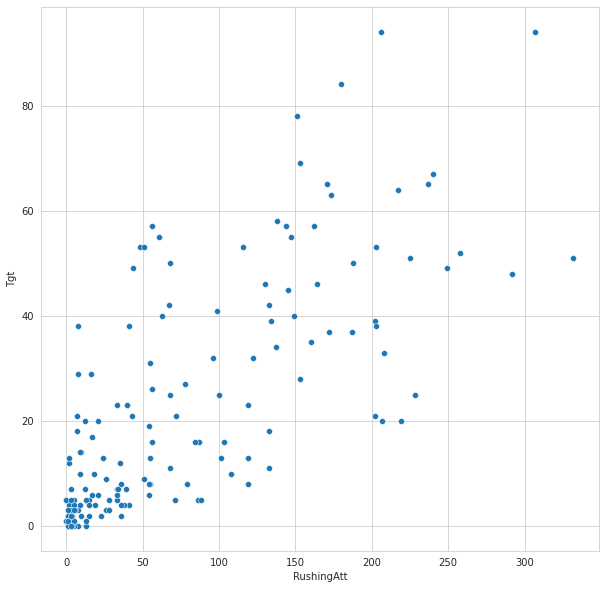

In [22]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))

sns.scatterplot(x=rb_df['RushingAtt'], y=rb_df['Tgt']);

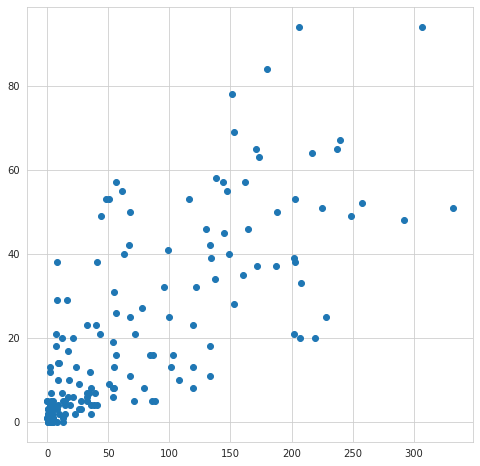

In [27]:
plt.figure(figsize=(8,8))

plt.scatter(x=rb_df['RushingAtt'], y=rb_df['Tgt']);

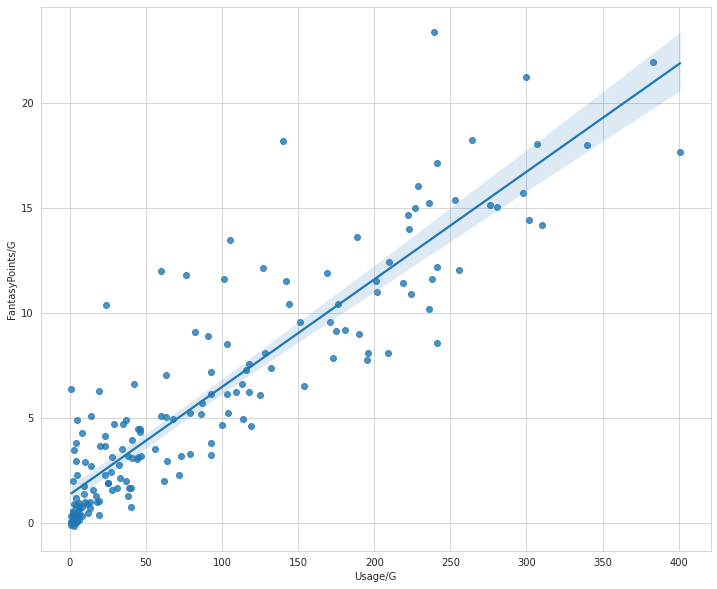

In [30]:
rb_df['Usage/G'] = rb_df['Tgt'] + rb_df['RushingAtt']

plt.figure(figsize=(12,10))

sns.regplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G']);

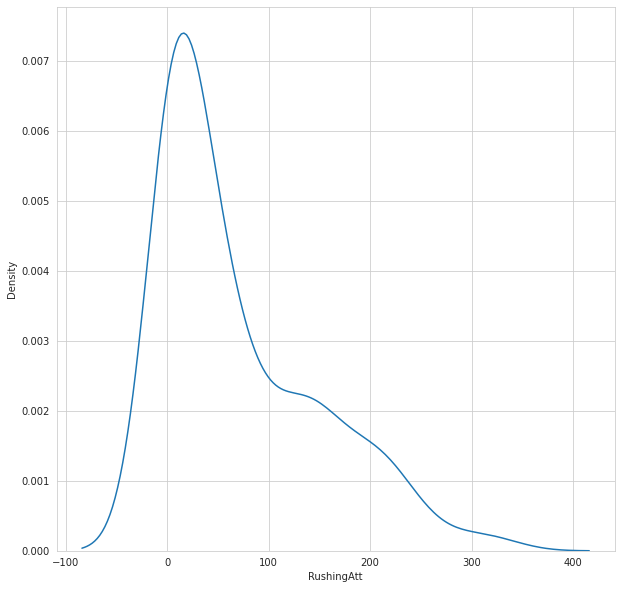

In [32]:
plt.figure(figsize=(10,10))

sns.kdeplot(rb_df['RushingAtt']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


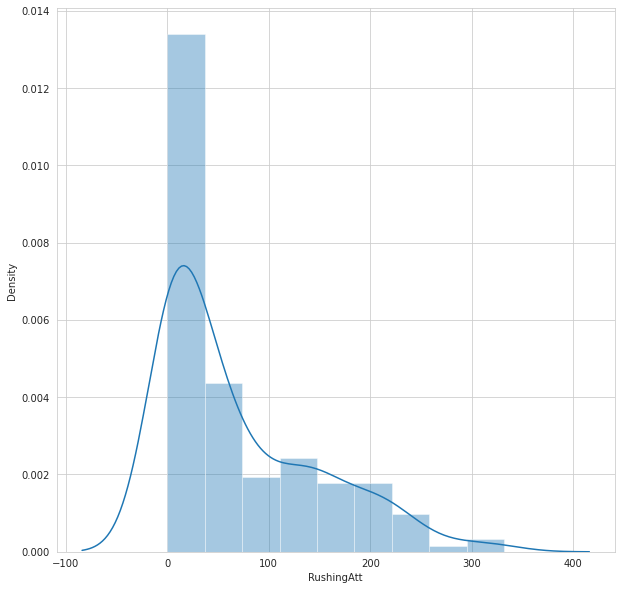

In [39]:
plt.figure(figsize=(10,10))
sns.distplot(rb_df['RushingAtt']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


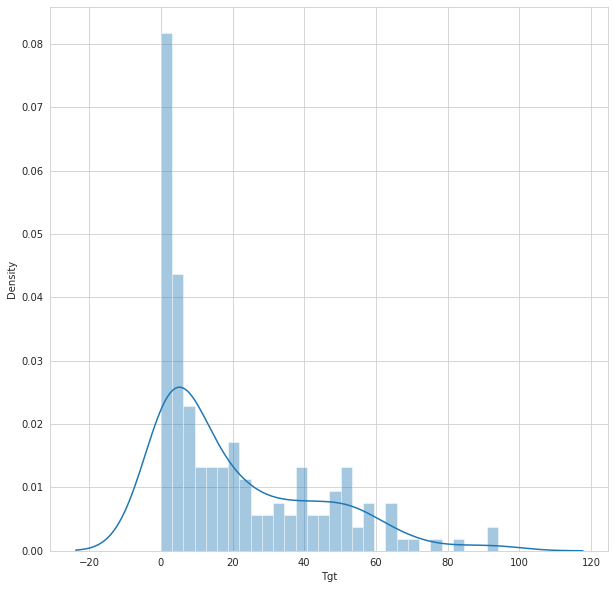

In [41]:
plt.figure(figsize=(10,10))
sns.distplot(rb_df['Tgt'], bins=30);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


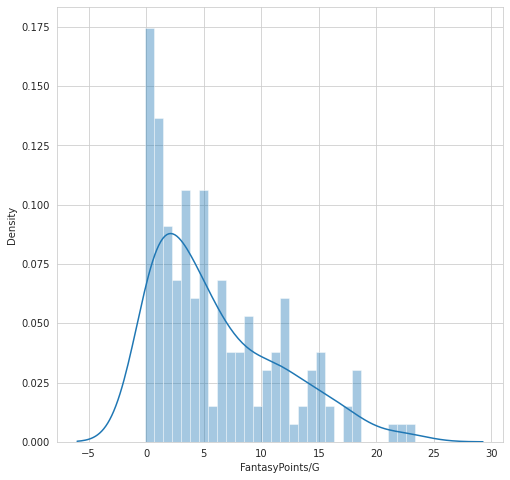

In [42]:
plt.figure(figsize=(8,8))
sns.distplot(rb_df['FantasyPoints/G'], bins=30);

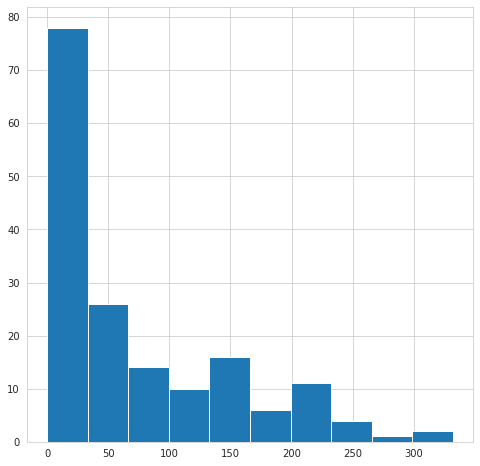

In [43]:
plt.figure(figsize=(8,8))
plt.hist(rb_df['RushingAtt']);

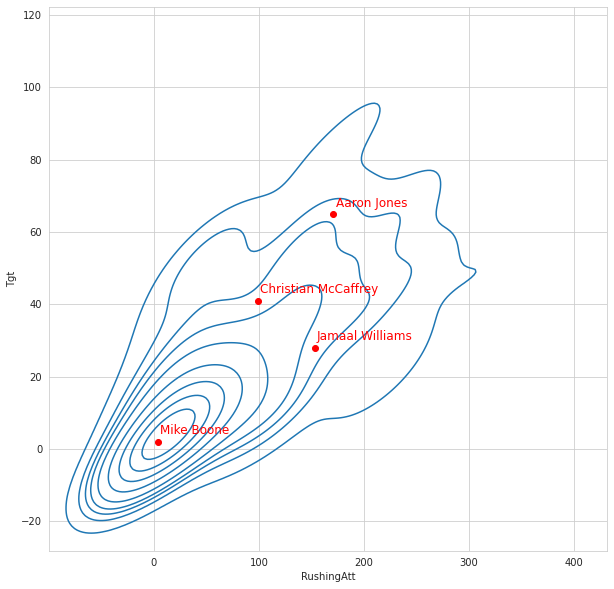

In [48]:
fig, ax = plt.subplots(figsize=(10,10));

notable_players = ['Christian McCaffrey', 'Aaron Jones', 'Jamaal Williams', 'Mike Boone']

for player_name in notable_players:
  player = rb_df.loc[rb_df['Player'] == player_name]

  if not player.empty:
    targets = player['Tgt']
    rushes = player['RushingAtt']

    ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
    ax.scatter(x=rushes, y=targets, color='red')

sns.kdeplot(x=rb_df['RushingAtt'], y=rb_df['Tgt']);

<Figure size 720x720 with 0 Axes>

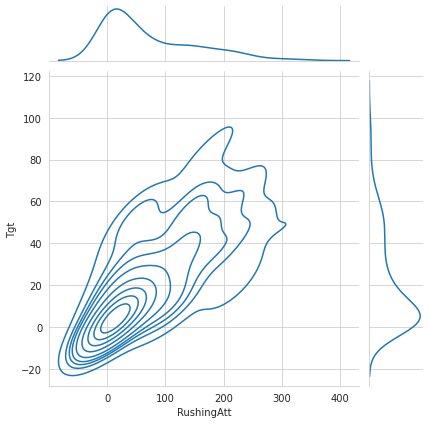

In [53]:
plt.figure(figsize=(10,10))

sns.jointplot(x=rb_df['RushingAtt'], y=rb_df['Tgt'], kind='kde');

Text(0, 0.5, 'FantasyPoints/G')

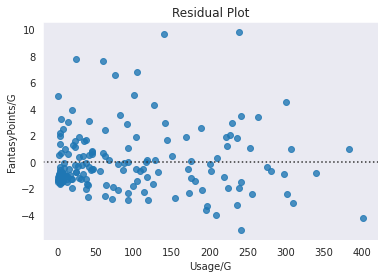

In [54]:
sns.set_style('dark')

sns.residplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G']);

plt.title('Residual Plot')
plt.xlabel('Usage/G')
plt.ylabel('FantasyPoints/G')